# Descriptive look into the quantitative data

Overview:

1. Performance
2. Time
3. Actions
4. Furniture Parts
5. Furniture items
6. Resources left


In [1]:
import sys

import pandas as pd
import numpy as np
import ast
import json
import os
from df_utils import *
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
sys.path.insert(0,'../utils')
from helper_solution_analysis import *
from lp_utils import *
cur_dir =  os.getcwd() 
sns.set(font_scale=2, style = 'white', palette = 'Set3') 

Get Data

In [2]:
# get data csv

parent_dir = os.path.dirname(os.path.dirname(os.getcwd() ))
data_file = 'data/online/full_experiment/data_furnituremanufacturing_2021-08-11_09-15.csv'
data_path = os.path.join(parent_dir, data_file)

# transform to dataframe
df, df_model, df_ge, df_vp_sol, df_qual,  df_actions, df_built, df_resources, df_play_times = decompose_csv(data_path)

df_complete_sol = get_complete_sol(df_resources)


read cache


In [7]:
df_model.loc[132, df_model.columns[12:]].values

array([4., 6., 1., 4., 1., 4., 4., 4., 1., 1., 1., 1., 2., 0., 4., 2., 4.,
       2., 0., 2., 4., 4., 4., 4., 4., 0., 2., 4., 4., 4., 4., 3., 2., 1.,
       4., 0., 2., 3., 3., 2., 2., 2., 0., 3., 4., 5., 2., 5.])

##  1. Performance Analysis
 
 * absolute solution value for each VP (individual, all but individual line, grouped)
 * difference to optimal solution
 * indication of average over difference of solutions

### Performance for all Vps, individual lines

In [5]:
df_sol = pd.DataFrame(df_vp_sol.filter(regex='PL01').values, columns = list(range(1,13)))
df_sol['vp'] = range(1, len(df_sol) + 1)
df_sol = df_sol.set_index('vp')
df_sol.columns.name = 'month'
df_sol = df_sol.melt(value_name = 'solutions', ignore_index=False)#


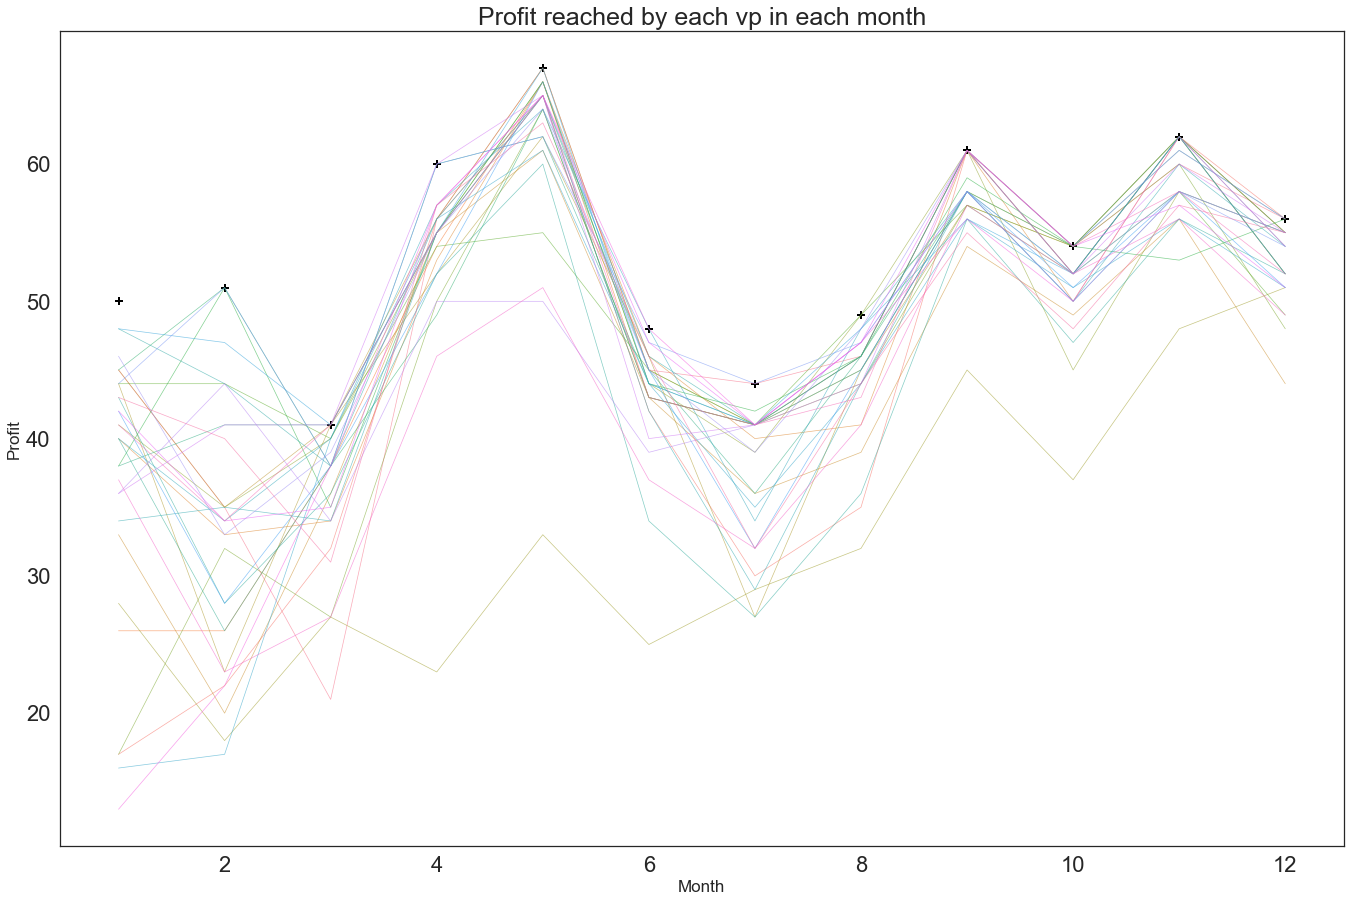

In [6]:
fig = plt.figure(figsize=(23, 15) )
plt.title('Profit reached by each vp in each month', fontsize = 25)


df_sol = pd.DataFrame(df_vp_sol.filter(regex='PL01').values, columns = list(range(1,13)))
df_sol['vp'] = range(1, len(df_sol) + 1)
df_sol = df_sol.set_index('vp')
df_sol.columns.name = 'month'
df_sol = df_sol.melt(value_name = 'solutions', ignore_index=False)#
c_map =  sns.color_palette('husl', n_colors=len(df))
#, hue =df_sol.index

data = df_sol[df_sol.month >0]
data['vp'] = data.index
data.index = range(len(data.index))
g =sns.lineplot(data = data,x='month', y = 'solutions' ,hue = 'vp', palette = c_map,alpha = 0.6,linewidth = 0.7, legend = False)
scatter = sns.scatterplot(x=list(range(1,13)),y=df_model.filter(regex = 'MD01').iloc[0], s=80,  linewidth = 2,  marker = "+", color = 'black')

xlabel = plt.xlabel('Month', fontsize = 17)
ylabel = plt.ylabel('Profit', fontsize = 17)
                    
fig.savefig('Images/performance_compared_to_optimal_individual.png' ,bbox_inches='tight')

### Absolute performance

/home/cath/Downloads/s/envs/plexplain/lib/python3.7/site-packages/seaborn/categorical.py:1296: UserWarning: 19.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/home/cath/Downloads/s/envs/plexplain/lib/python3.7/site-packages/seaborn/categorical.py:1296: UserWarning: 16.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/home/cath/Downloads/s/envs/plexplain/lib/python3.7/site-packages/seaborn/categorical.py:1296: UserWarning: 9.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


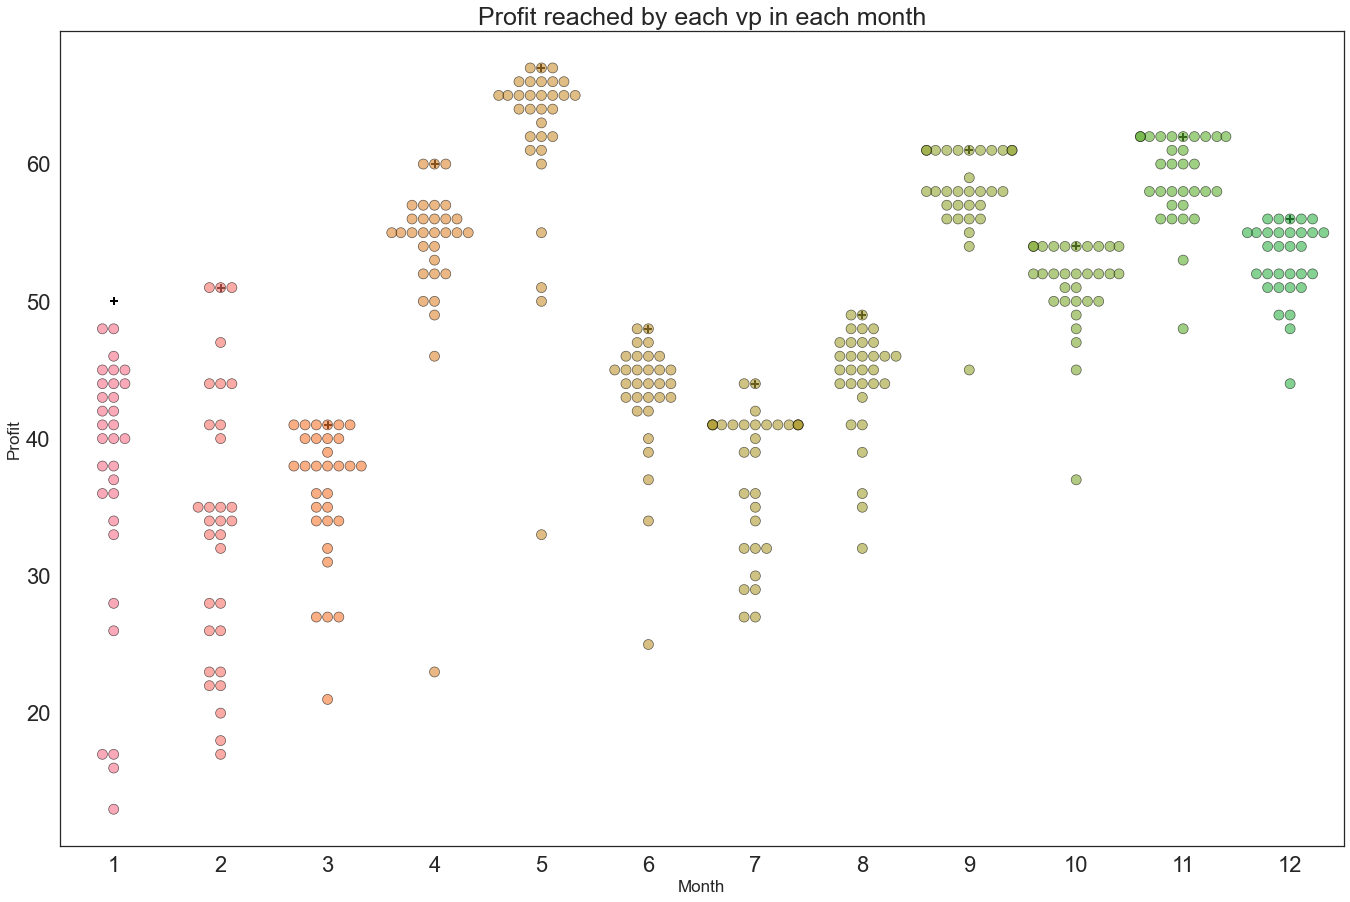

In [7]:
fig = plt.figure(figsize=(23, 15) )
plt.title('Profit reached by each vp in each month', fontsize = 25)

df_sol = pd.DataFrame(df_vp_sol.filter(regex='PL01').values, columns = list(range(1,13)))
df_sol['vp'] = range(1, len(df_sol) + 1)
df_sol = df_sol.set_index('vp')
df_sol.columns.name = 'month'
df_sol = df_sol.melt(value_name = 'solutions', ignore_index=False)#
c_map =  sns.color_palette('husl', n_colors=len(df))
#, hue =df_sol.index
g =sns.swarmplot(data = df_sol,x='month', y = 'solutions', palette = c_map,alpha = 0.6,linewidth = 0.7, edgecolor="black", size = 10)
scatter = sns.scatterplot(x=list(range(12)),y=df_model.filter(regex = 'MD01').iloc[0], s=80,  linewidth = 2,  marker = "+", color = 'black')

xlabel = plt.xlabel('Month', fontsize = 17)
ylabel = plt.ylabel('Profit', fontsize = 17)

fig.savefig('Images/performance_compared_to_optimal.png' ,bbox_inches='tight')

### Difference to optimal

/home/cath/Downloads/s/envs/plexplain/lib/python3.7/site-packages/seaborn/categorical.py:1296: UserWarning: 12.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/home/cath/Downloads/s/envs/plexplain/lib/python3.7/site-packages/seaborn/categorical.py:1296: UserWarning: 6.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


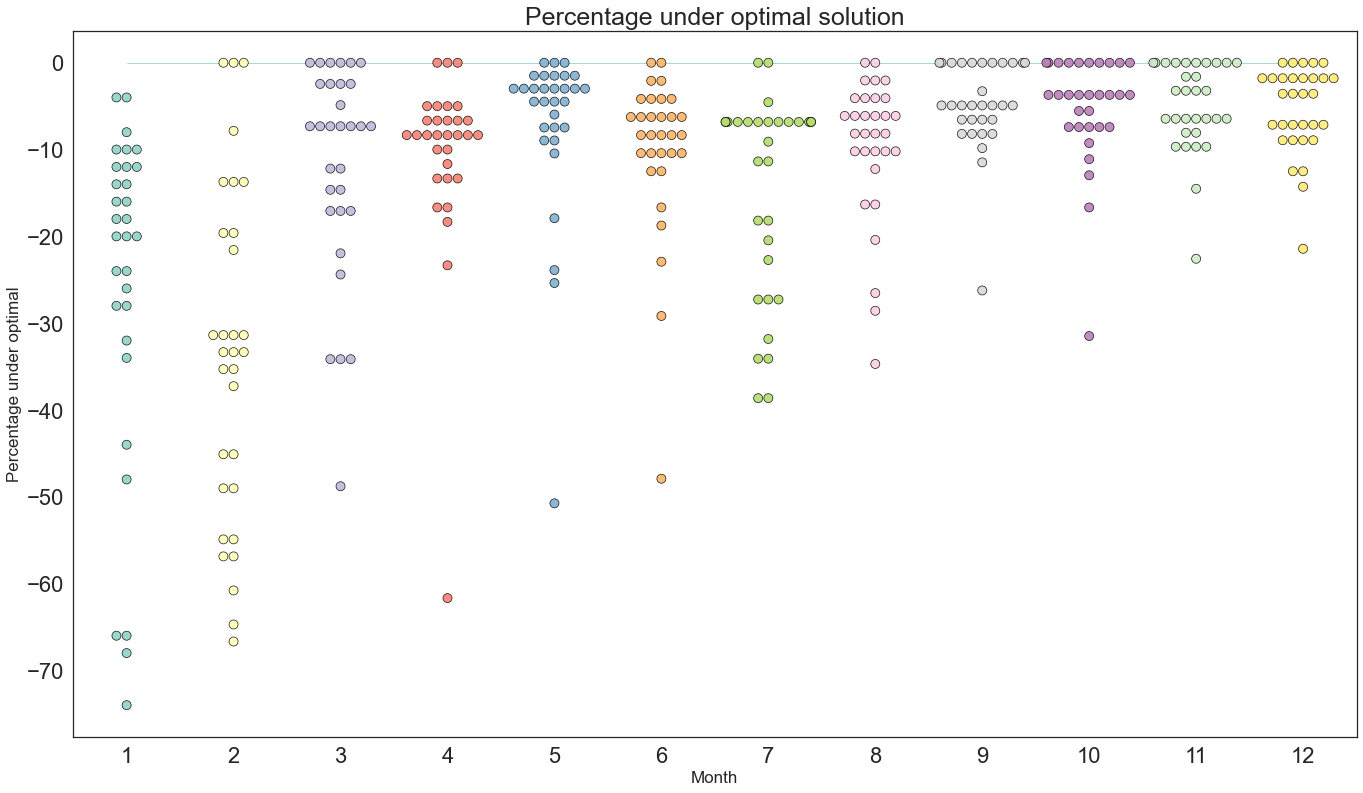

In [8]:
fig = plt.figure(figsize=(23, 13) )
plt.title('Percentage under optimal solution', fontsize = 25)
difference = ((df_vp_sol.filter(regex='PL01').values/df_model.filter(regex = 'MD01').iloc[0].values)-1)*100
df_diff = get_df_diff(df_vp_sol, df_model)


df_plot = df_diff.melt(value_name = 'difference', ignore_index=False)#
sns.lineplot(x=list(range(12)),y=np.zeros(12), linewidth = 0.8)
sns.swarmplot(data = df_plot,x='month', y = 'difference', alpha = 0.9,  size = 9,linewidth = 0.7, edgecolor="black")
xlabel = plt.xlabel('Month', fontsize = 17)
ylabel = plt.ylabel('Percentage under optimal', fontsize = 17)

fig.savefig('Images/difference_to_optimal.png',bbox_inches='tight')


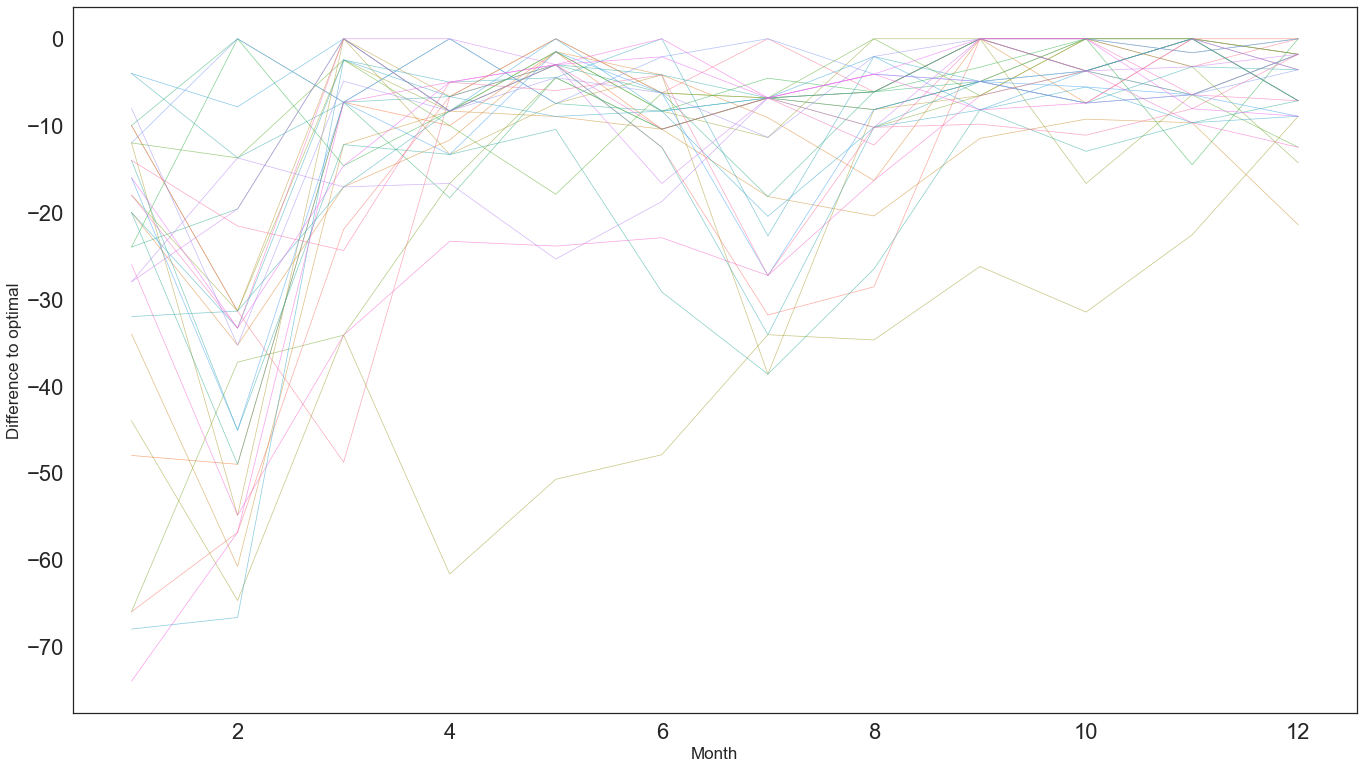

In [9]:
fig = plt.figure(figsize=(23, 13) )

df_diff = get_df_diff(df_vp_sol, df_model)
df_plot = df_diff.melt(value_name = 'difference', ignore_index=False)#

data = df_plot[df_plot.month >0]
data['vp'] = data.index
data.index = range(len(data.index))


g =sns.lineplot(data = data,x='month', y = 'difference',hue = 'vp', palette = c_map,alpha = 0.6,linewidth = 0.7,legend = False)

xlabel = plt.xlabel('Month', fontsize = 17)
ylabel = plt.ylabel('Difference to optimal', fontsize = 17)




### Violin plot on average to optimal solution

/home/cath/Downloads/s/envs/plexplain/lib/python3.7/site-packages/seaborn/categorical.py:1296: UserWarning: 6.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


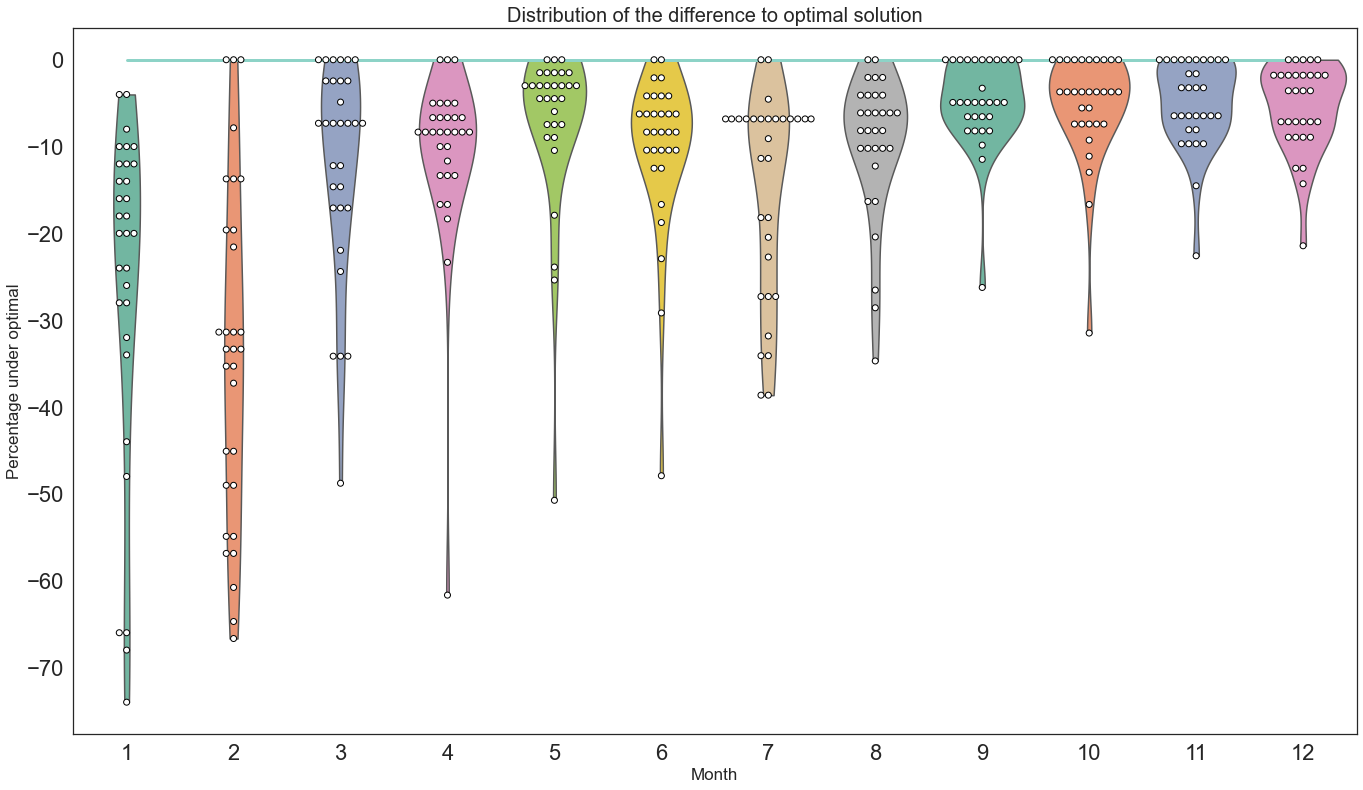

In [10]:
fig = plt.figure(figsize=(23, 13) )
plt.title('Distribution of the difference to optimal solution', fontsize = 20)
df_plot = df_diff.melt(value_name = 'difference', ignore_index=False)#
sns.lineplot(x=list(range(12)),y=np.zeros(12), linewidth = 3)
sns.violinplot(data = df_plot,x='month',y = 'difference', palette="Set2", cut = 0, inner = None)
sns.swarmplot( data = df_plot,x='month',y = 'difference', color = 'white', linewidth=1, size = 6, edgecolor="black")
xlabel = plt.xlabel('Month', fontsize = 17)
ylabel = plt.ylabel('Percentage under optimal', fontsize = 17)
fig.savefig('Images/violin_difference_to_optimal.png')

## Analysis with complete solution
color code the completeness status of each solution

/home/cath/Downloads/s/envs/plexplain/lib/python3.7/site-packages/seaborn/categorical.py:1296: UserWarning: 19.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/home/cath/Downloads/s/envs/plexplain/lib/python3.7/site-packages/seaborn/categorical.py:1296: UserWarning: 16.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/home/cath/Downloads/s/envs/plexplain/lib/python3.7/site-packages/seaborn/categorical.py:1296: UserWarning: 9.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


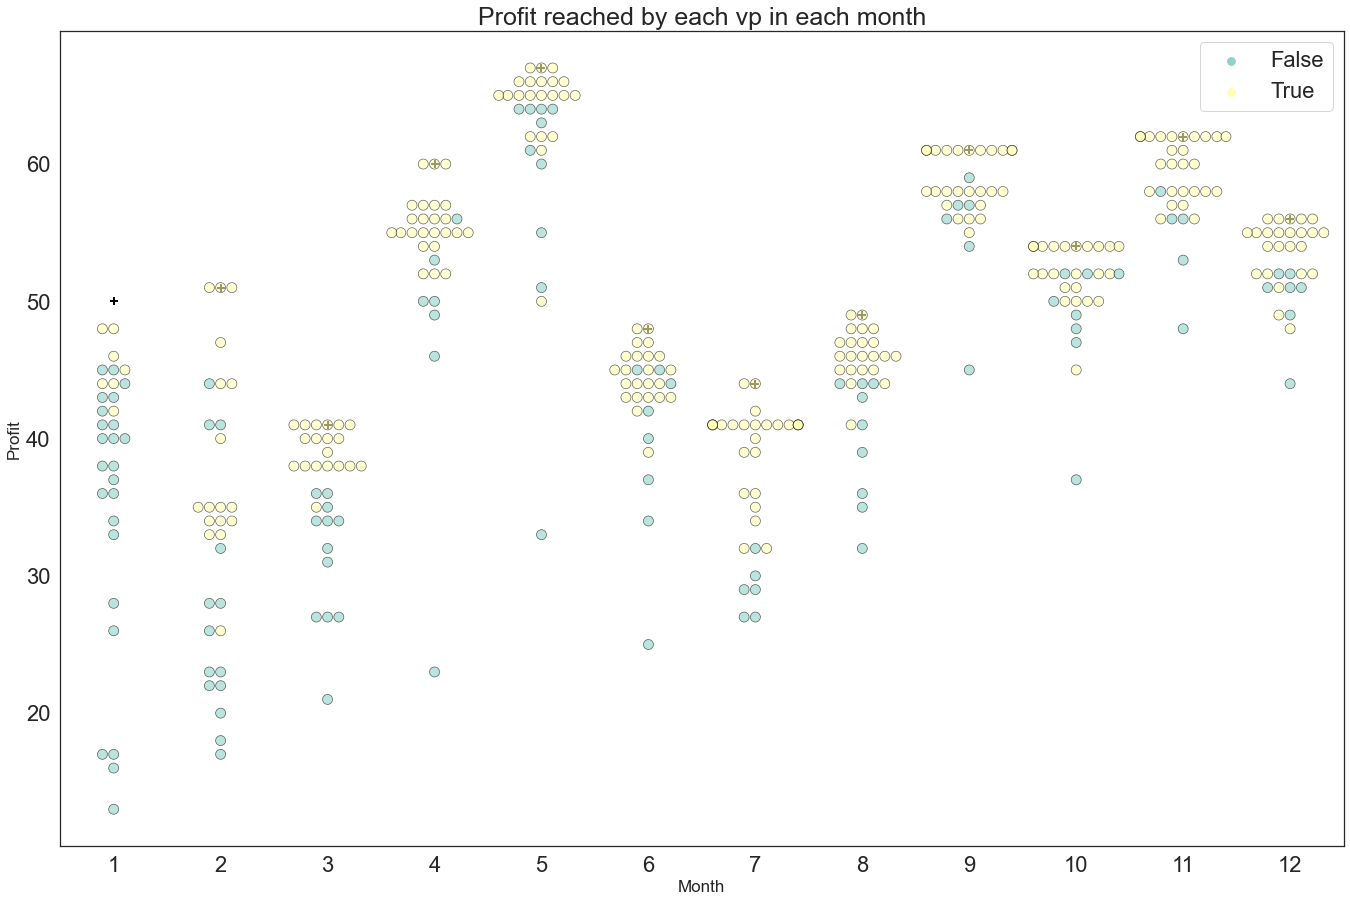

In [11]:
fig = plt.figure(figsize=(23, 15) )
plt.title('Profit reached by each vp in each month', fontsize = 25)

df_sol = pd.DataFrame(df_vp_sol.filter(regex='PL01').values, columns = list(range(1,13)))
df_sol['vp'] = df_vp_sol.filter(regex='PL01').index
df_sol = df_sol.set_index('vp')
df_sol.columns.name = 'month'
df_sol = df_sol.melt(value_name = 'solutions', ignore_index=False)#
df_complete_mask = df_complete_sol.melt(value_name = 'complete', ignore_index=False)
df_sol_with_mask = pd.concat([df_sol, df_complete_mask['complete']], axis = 1)
c_map =  sns.color_palette('husl', n_colors=len(df))
#, hue =df_sol.index
g =sns.swarmplot(data = df_sol_with_mask,x='month', y = 'solutions', hue = 'complete',alpha = 0.6,linewidth = 0.7, edgecolor="black", size = 10)
scatter = sns.scatterplot(x=list(range(12)),y=df_model.filter(regex = 'MD01').iloc[0], s=80,  linewidth = 2,  marker = "+", color = 'black')

xlabel = plt.xlabel('Month', fontsize = 17)
ylabel = plt.ylabel('Profit', fontsize = 17)
df_sol
fig.savefig('Images/performance_compared_to_optimal_with_completeness.jpg' ,bbox_inches='tight')

/home/cath/Downloads/s/envs/plexplain/lib/python3.7/site-packages/seaborn/categorical.py:1296: UserWarning: 12.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/home/cath/Downloads/s/envs/plexplain/lib/python3.7/site-packages/seaborn/categorical.py:1296: UserWarning: 6.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


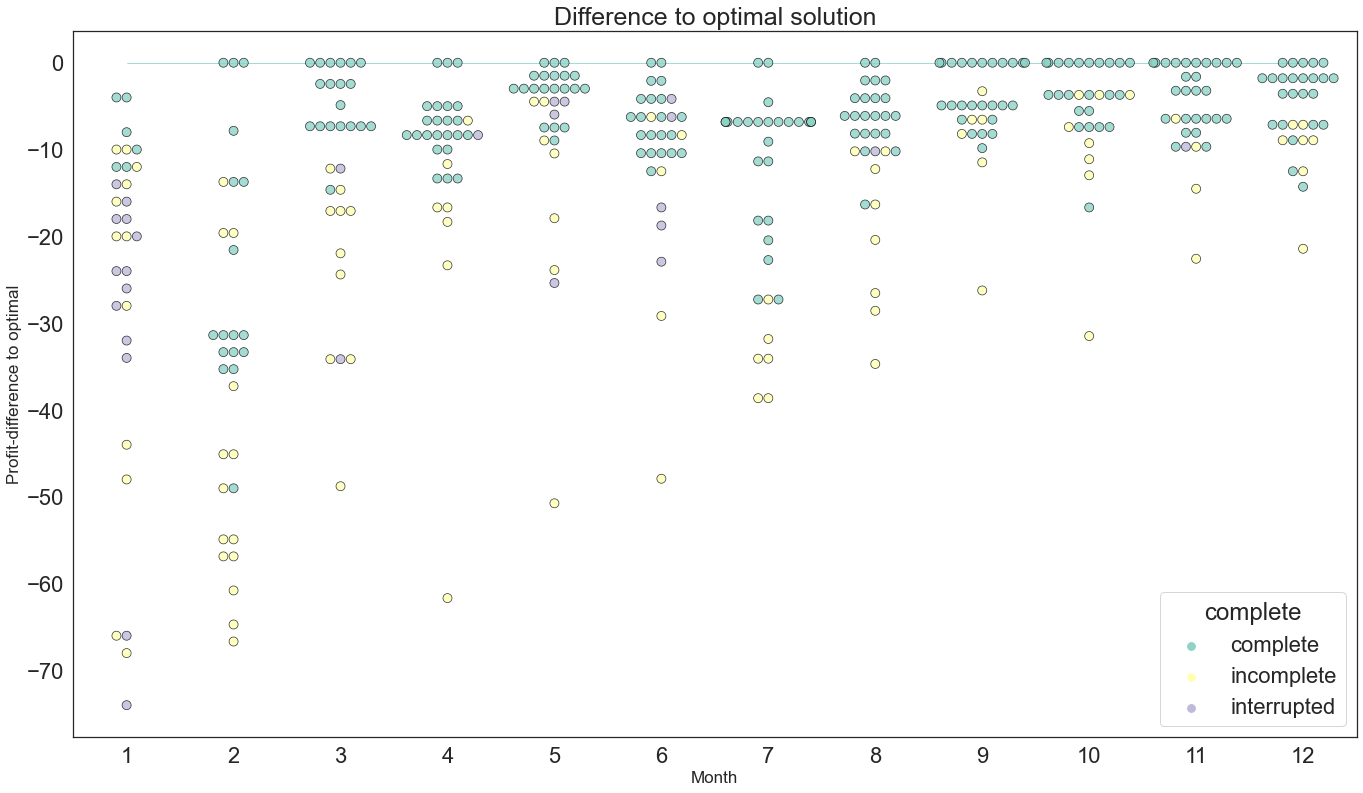

In [12]:
 fig = plt.figure(figsize=(23, 13) )
plt.title('Difference to optimal solution', fontsize = 25)

df_diff_with_mask = get_diff_mask(df_vp_sol,df_model, df_complete_sol)
sns.lineplot(x=list(range(12)),y=np.zeros(12), linewidth = 0.8)
sns.swarmplot(data = df_diff_with_mask ,x='month', y = 'difference',hue = 'complete', alpha = 0.8,  size = 9,linewidth = 0.7, edgecolor="black")
xlabel = plt.xlabel('Month', fontsize = 17)
ylabel = plt.ylabel('Profit-difference to optimal', fontsize = 17)

fig.savefig('Images/difference_to_optimal_with_completeness.jpg',bbox_inches='tight')

## Time Analysis

Overview over monthly events:

* Month 1 starts after closing of first message dialogue (all actions before are in the tutorial)
* Question dialogs/newspaper are logged at the beginning of next month
* Last indicator of action in month 12, is before the last question is asked

/home/cath/Downloads/s/envs/plexplain/lib/python3.7/site-packages/seaborn/categorical.py:1296: UserWarning: 32.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


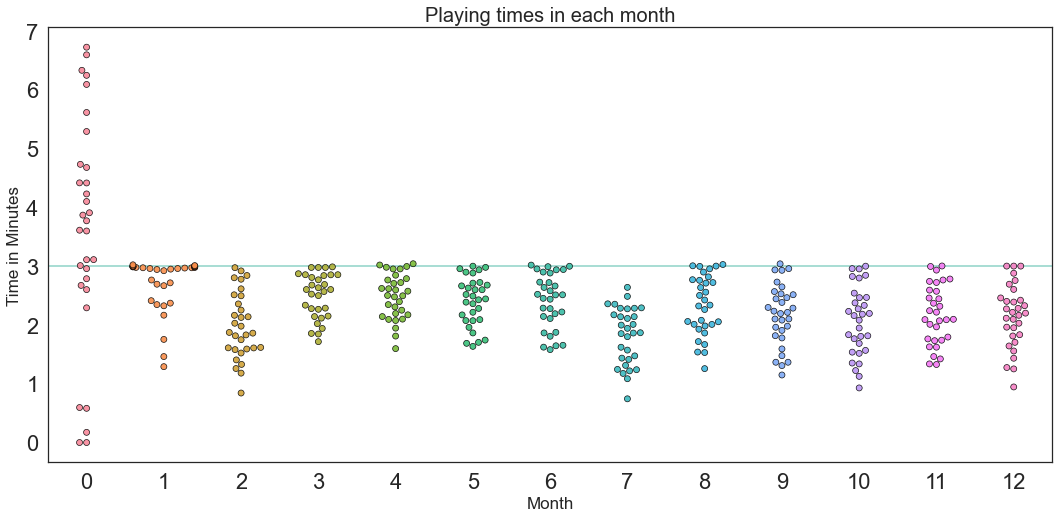

In [13]:
fig = plt.figure(figsize=(18, 8) )
plt.title('Playing times in each month', fontsize = 20)

sns.swarmplot(data = df_play_times,x='month', y = 'minutes',alpha = 0.9,linewidth = 0.7, edgecolor="black", size = 6)
plt.axhline(3)

xlabel = plt.xlabel('Month', fontsize = 17)
ylabel = plt.ylabel('Time in Minutes', fontsize = 17)
fig.savefig('Images/playing_times_with_tutorial.png',bbox_inches='tight')


/home/cath/Downloads/s/envs/plexplain/lib/python3.7/site-packages/seaborn/categorical.py:1296: UserWarning: 9.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


VPs that broke the 3 minute limit are:

[167, 222, 230, 142, 230, 230, 164, 226, 154, 226]


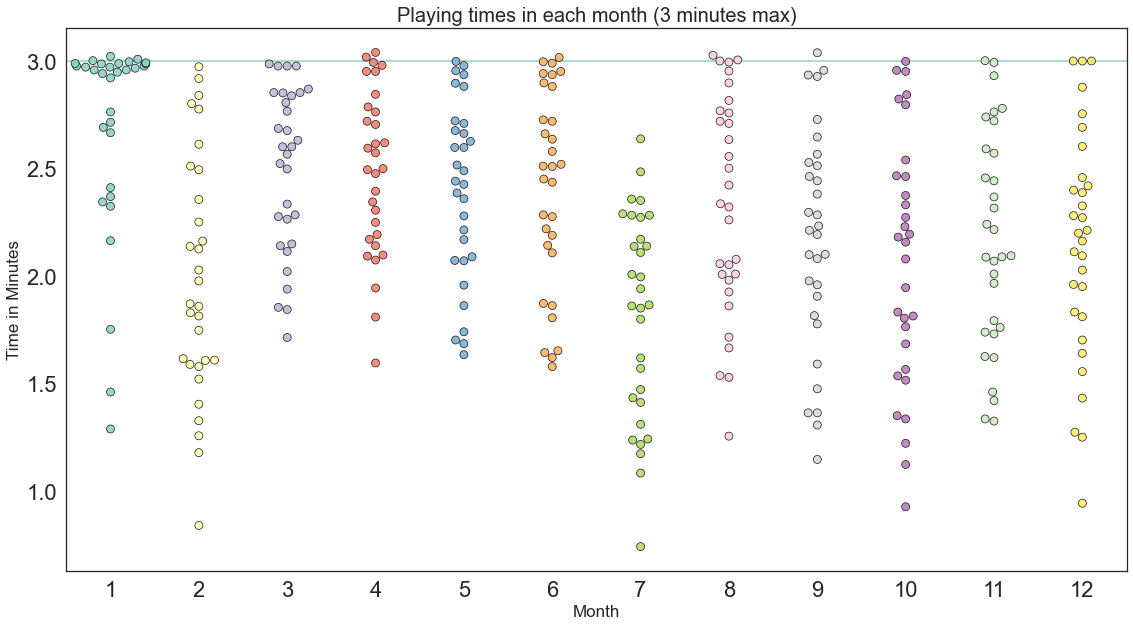

In [14]:
fig = plt.figure(figsize=(19, 10) )
plt.title('Playing times in each month (3 minutes max)', fontsize = 20)

g = sns.swarmplot(data = df_play_times[df_play_times.month > 0 ],x='month', y = 'minutes',
              alpha = 0.9,linewidth = 0.7, edgecolor="black", 
              size = 8)

plt.axhline(3)
xlabel = plt.xlabel('Month', fontsize = 17)
ylabel = plt.ylabel('Time in Minutes', fontsize = 17)
fig.savefig('Images/playing_times.png',bbox_inches='tight')

print( 'VPs that broke the 3 minute limit are:\n')
print(list(df_play_times[(df_play_times.month > 0) &(df_play_times.minutes > 3.0)].index))

In some month people broke the time limit!
(VPs: 13, 21, 5, 4, 11, 8)
5 and 21 were notorious
TODO

# Action Trajectories

*  Average over all types of actions/grouped

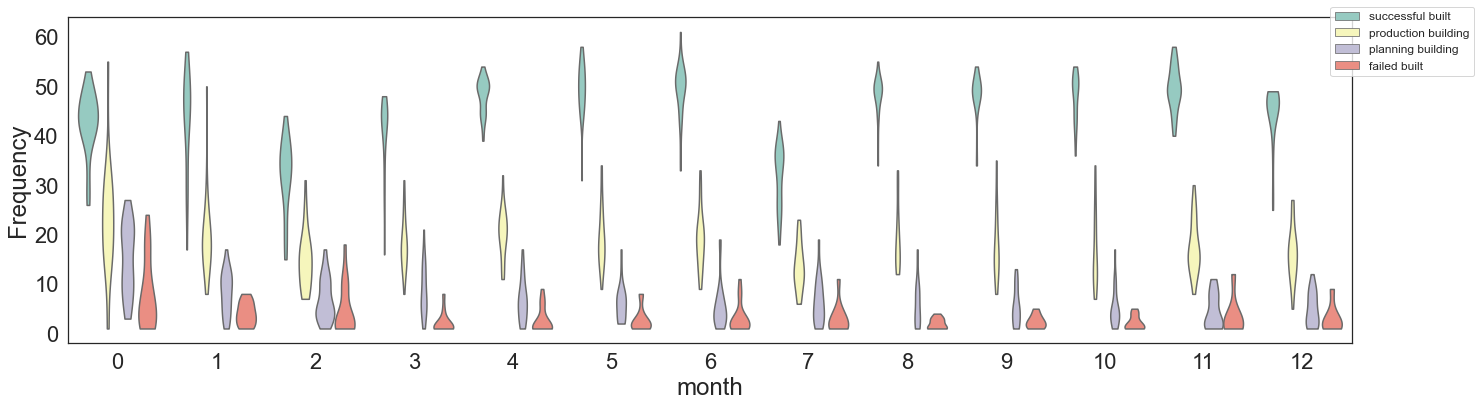

In [15]:
df_general_freq = df_actions[(df_actions.action_type != 'close building') 
                    & (df_actions.action_type != 'sound')& (df_actions.action_type != 'warning')& 
                    (df_actions.action_type != 'question')& (df_actions.action_type != 'skipped')]

counts= df_general_freq.groupby(['month','vp']).action_type.value_counts()

counts = counts.reset_index(level='month')
counts = counts.rename(columns = {'action_type': 'Frequency'})
counts = counts.reset_index(level='action_type')
fig = plt.figure(figsize=(23, 6) )

g = sns.violinplot(data = counts, x = 'month', y = 'Frequency', hue = 'action_type', inner = None, cut = 0)
g.legend(bbox_to_anchor=(1.1, 1.05), fontsize = 12)


## Used builts

In [16]:
sns.set(font_scale=2, style = 'ticks', palette = 'deep') 


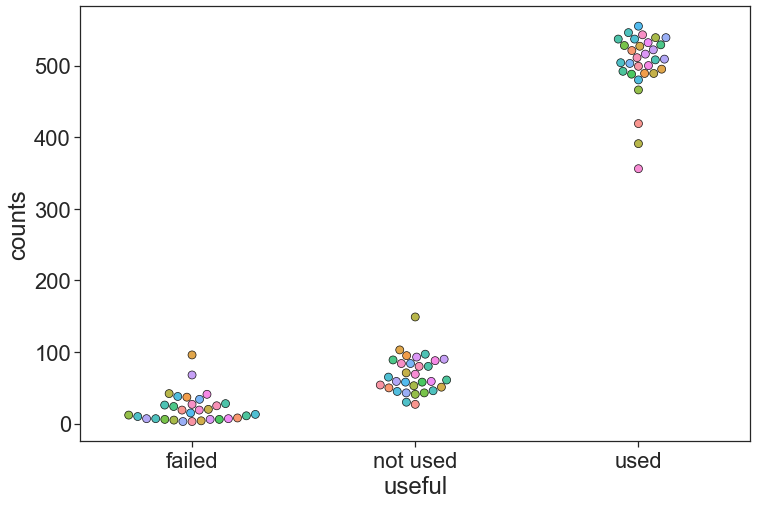

In [17]:
fig = plt.figure(figsize=(12, 8) )
stats_useful = df_built.groupby(['vp','useful'])['action'].count()
df_useful = pd.DataFrame(stats_useful).rename(columns = {'action': 'counts'})

df_useful = df_useful.reset_index(level=['useful'])

g = sns.swarmplot(data = df_useful, x='useful', y = 'counts',  hue = df_useful.index ,alpha = 0.9,linewidth = 0.7, edgecolor="black", 
              size = 8) 
g.get_legend().remove()



## Leftover Resources

* material
* workshop hours


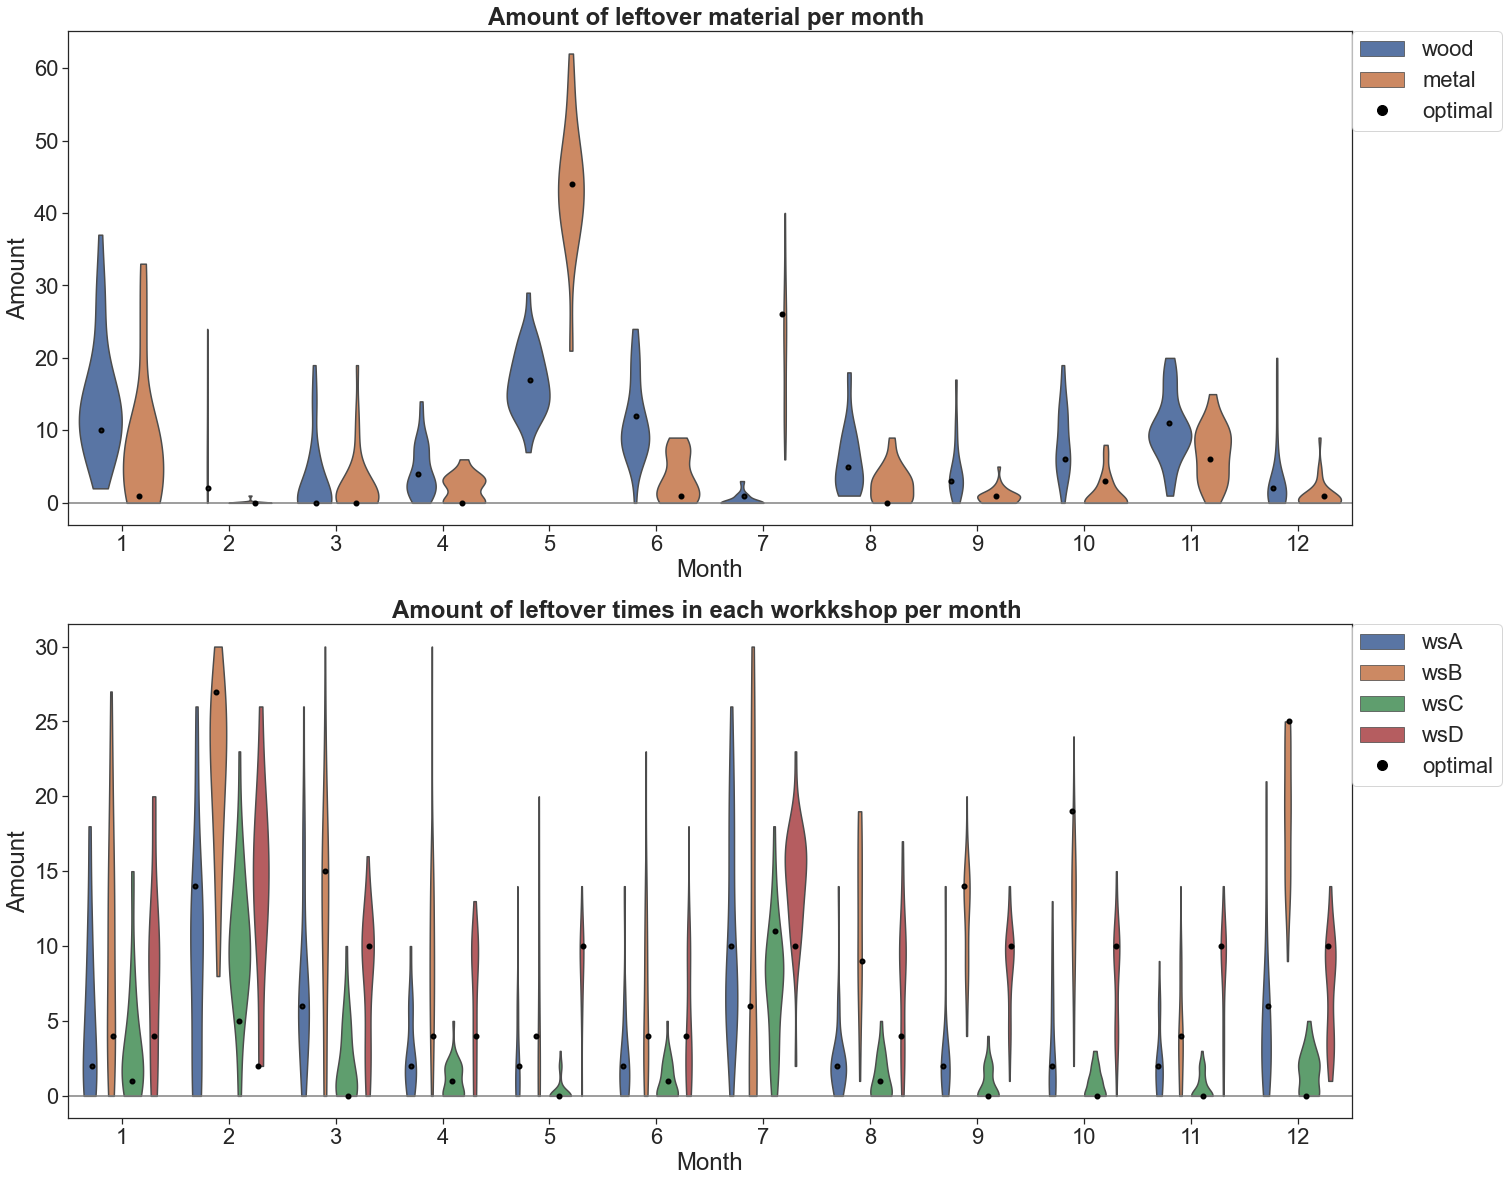

In [18]:
fig = plt.figure(figsize=(23, 20))
sub = fig.add_subplot(2,1,1)
sub.set_title('Amount of leftover material per month ', fontweight='bold')
df_leftover = leftover_res_model(df_model)
model_material = df_leftover[['wood', 'metal', 'month']]
last_steps =    df_resources[df_resources.month >0].groupby(['vp', 'month']).timepoint.idxmax().values
material= df_resources.loc[last_steps, ['wood', 'metal', 'month', 'vp']]
sns.violinplot(data = material.melt(id_vars=['month', 'vp']), x = 'month', y = 'value', hue = 'variable', ax = sub,inner = None, cut = 0)
#sns.swarmplot(data = material.melt(id_vars=['month', 'vp']), x = 'month', y = 'value', 
              #hue = 'variable', ax = sub, dodge = True, linewidth=1)
sns.stripplot(data= model_material.melt(id_vars=['month']), x= 'month', y = 'value', hue='variable',
              ax = sub, dodge=True,  linewidth=2, color = 'black', marker = 'o', size = 4)

plt.axhline(0, color = 'gray')
xlabel = plt.xlabel('Month')
ylabel = plt.ylabel('Amount')
handles, labels = sub.get_legend_handles_labels()
custom_handles = [handles[0],handles[1], Line2D([], [], marker='o', color='black', label='optimal',linestyle='None',
                              markerfacecolor='black', markersize=10)]
custom_labels = [labels[0], labels[1] ,'optimal']
l = sub.legend(custom_handles, custom_labels, bbox_to_anchor=(1, 1), loc=2, borderaxespad=0.)

sub1 = fig.add_subplot(2,1,2)
sub1.set_title('Amount of leftover times in each workkshop per month ', fontweight='bold')
workshops = df_resources.loc[last_steps, ['wsA', 'wsB', 'wsC', 'wsD','month', 'vp']]
model_workshops = df_leftover[['wsA', 'wsB', 'wsC', 'wsD', 'month']]
sns.violinplot(data = workshops.melt(id_vars=['month', 'vp']), x = 'month', y = 'value', hue = 'variable', ax = sub1, inner = None, cut = 0)
sns.stripplot(data= model_workshops.melt(id_vars=['month']), x= 'month', y = 'value', hue='variable',
              ax = sub1, dodge=True,  linewidth=2, color = 'black', marker = 'o', size = 4)
plt.axhline(0, color = 'gray')
xlabel = plt.xlabel('Month')
ylabel = plt.ylabel('Amount')
handles, labels = sub1.get_legend_handles_labels()

custom_handles = [handles[0],handles[1],handles[2] ,handles[3],Line2D([], [], marker='o', color='black', label='optimal',linestyle='None',
                              markerfacecolor='black', markersize=10)]
custom_labels = [labels[0], labels[1] ,labels[2] ,labels[3] ,'optimal']
l = sub1.legend(custom_handles, custom_labels, bbox_to_anchor=(1, 1), loc=2, borderaxespad=0.)



fig.savefig('Images/leftover_resources_violin.png',bbox_inches='tight')


In [19]:
df_ge
age_dict = {1:'< 18', 2: '18-24', 3: '25-29', 4:'30-30',5:'40-49', 6:'50-59', 7: '> 60'} # GE01
gender = {-1: 'na', 1:' male', 2: 'female', 3: 'diverse'} # GE03
experience = {1:'no games in my free time', 2: 'irregular intervals', 3: '2-3x in month', 4:'at least 1x week (regularly)'}
df_demographics = pd.DataFrame()
df_demographics['Age'] = df_ge.GE01.map(age_dict)
df_demographics['Gender'] = df_ge.GE03.map(gender)
df_demographics['Experience'] = df_ge.GE03.map(experience)

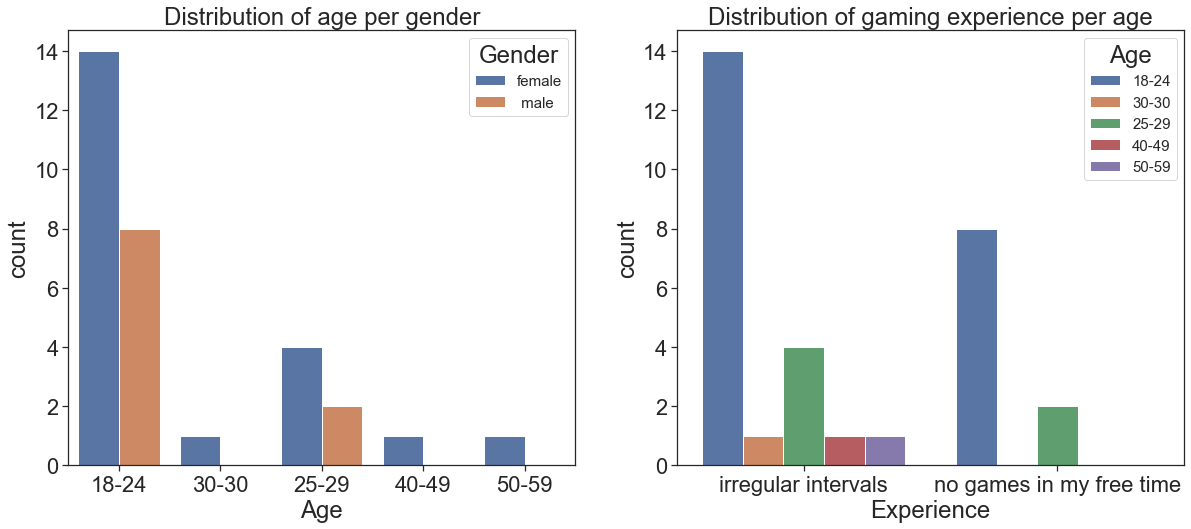

In [20]:

sns.set(font_scale=2, style = 'ticks', palette = 'deep') 
fig = plt.figure(figsize=(20, 8))


sub = fig.add_subplot(1,2,1)
sub.set_title('Distribution of age per gender')
sns.countplot(data = df_demographics, x = 'Age', hue = 'Gender', ax = sub)
sub.legend(title = 'Gender',loc = 'upper right', fontsize = 15)

sub1 = fig.add_subplot(1,2,2)
sub1.set_title('Distribution of gaming experience per age')
sns.countplot(data = df_demographics, x = 'Experience',hue = 'Age', ax = sub1)
sub1.legend(title = 'Age',loc = 'upper right', fontsize = 15)
fig.savefig('Images/demographics.png',bbox_inches='tight')
